# Répartition des centrales hydrauliques en France 

On se base ici sur des données de data.gouv qui recensent les centrales hydrauliques d’une puissance supérieure à 100 MW - à l’exception des centrales dont la réserve secondaire est supérieure ou égale à 20MW (dc pas toutes !).

In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
centr = pd.read_csv("data/centrales.csv", sep = ";",index_col = "Centrale")
centr.shape

(50, 17)

On récupère que les centrales au fil de l'eau.

In [17]:
masq = (centr['Catégorie centrale'] == "Fil de l'eau")
centr_fdo = centr[masq]
centr_fdo

,Perimètre juridique,Perimètre spatial,Spatial perimeter,Filière,Sector,Catégorie centrale,Power station category,Année de mise en service,Puissance installée,Réserve secondaire maximale,Unité,Département,Code postal,Commune,Coordonnées X_WGS,Coordonnées Y_WGS,point_gps_wsg_84
Centrale,,,,,,,,,,,,,,,,,
FESSENHEIM,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1956,175.0,NaN,MW,HAUT-RHIN,68740,FESSENHEIM,47.915092,7.570539,"47.9150916717, 7.57053930693"
STRASBOURG,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1969,149.2,NaN,MW,BAS-RHIN,67000,STRASBOURG,48.525488,7.797562,"48.5254883575, 7.79756228905"
GERSTHEIM,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1967,139.4,NaN,MW,BAS-RHIN,67150,GERSTHEIM,48.403988,7.726943,"48.4039880395, 7.72694328696"
RHINAU,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1963,168.6,NaN,MW,BAS-RHIN,67860,RHINAU,48.284201,7.676273,"48.2842005908, 7.67627277851"
MARCKOLSHEIM,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1961,156.2,NaN,MW,BAS-RHIN,67390,MARCKOLSHEIM,48.154105,7.588361,"48.1541052048, 7.58836061302"
VOGELGRUN,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1959,140.5,NaN,MW,HAUT-RHIN,68600,VOGELGRUN,48.020400,7.574065,"48.0204002225, 7.57406533673"
KEMBS,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1932,162.1,NaN,MW,HAUT-RHIN,68680,KEMBS,47.654355,7.518769,"47.6543552963, 7.51876894514"
PASSY,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1951,104.0,NaN,MW,HAUTE-SAVOIE,74190,PASSY,45.917402,6.727292,"45.9174023363, 6.72729194677"
OTTMARSHEIM,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Hydraulique,Hydraulic,Fil de l'eau,As the water flows,1952,156.5,NaN,MW,HAUT-RHIN,68490,OTTMARSHEIM,47.773951,7.522290,"47.7739509952, 7.52228961614"


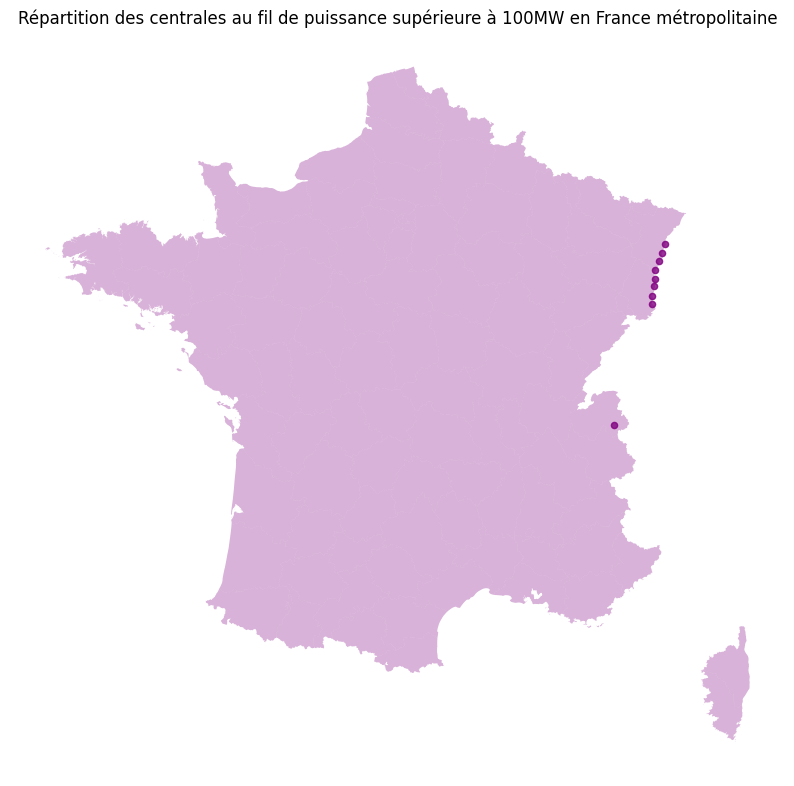

In [19]:
# On prépare la projection sur la carte de la France métropolitaine
# Pour ce faire, on utilise une carte administrative de la France initialement au format geoJSON
url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"

# on utilise alors geopandas pour récupérer notre dataframe
df_dep = gpd.read_file(url).set_index('nom')

fig, ax = plt.subplots(figsize=(10, 10))
df_dep.plot(color = 'purple',ax=ax, alpha = 0.3)
centr_fdo.plot(x = "Coordonnées Y_WGS", y = "Coordonnées X_WGS", kind = "scatter", color = "purple",ax=ax, alpha = 0.8)

plt.title('Répartition des centrales au fil de puissance supérieure à 100MW en France métropolitaine')
ax.axis("off")
plt.show()

In [44]:
centr2 = pd.read_csv("data/hydr.csv", sep=';', index_col = "libelle", encoding='latin-1')

In [46]:
masq = (centr2['categorie'] == "Ouvrage fonctionnant au fil de l'eau")
centr_fdo2 = centr2[masq]
centr_fdo2

,code,etat,insee_commune,nom_commune,mo_raison_sociale,x,y,precision_coord,categorie,puissance_maximum,productible_moyen,debit,coef_energetique,nb_turbines,type_turbine,titre,date_echeance_titre,hauteur_de_chute
libelle,,,,,,,,,,,,,,,,,,
Centrale de La Pachevie,15165001,EXPL,15165,Rouffiac,S.A.R.L. GLM,628810.56,6440017.02,0,Ouvrage fonctionnant au fil de l'eau,NaN,1840763.0,NaN,NaN,NaN,NaN,NaN,NaN,90.00
Centrale d'Albies,9004001,EXPL,9004,Albiès,ENERGIE ELECTRIQUE DE PALOUMA,593334.90,6187413.50,0,Ouvrage fonctionnant au fil de l'eau,1.888,3127132.0,NaN,NaN,NaN,NaN,Autorisée,2024-08-04,10.69
MOULIN DE ROQUES,9014001,EXPL,9014,Argein,HYDRO BOUIGANE,535762.00,6205445.50,0,Ouvrage fonctionnant au fil de l'eau,0.130,228122.0,NaN,NaN,NaN,NaN,NaN,NaN,4.70
Centrale d'Arignac,9015001,EXPL,9015,Arignac,MOULIN D'ARIGNAC,585909.30,6197056.50,0,Ouvrage fonctionnant au fil de l'eau,NaN,346776.0,NaN,NaN,NaN,NaN,NaN,NaN,13.60
Moulin de la Calviere,9015002,HORS,9015,Arignac,SNC CALVIERE,585009.94,6198011.50,0,Ouvrage fonctionnant au fil de l'eau,NaN,531075.0,NaN,NaN,NaN,NaN,NaN,NaN,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Centrale de Lamothe Saliens,82150001,EXPL,82150,Reyniès,SALIENS S.A.,573843.47,6313646.51,0,Ouvrage fonctionnant au fil de l'eau,1.300,6766717.0,NaN,NaN,NaN,NaN,Concédée (autorisable),NaN,2.60
Centrale des Ondes,82155001,EXPL,82155,Saint-Antonin-Noble-Val,VOLT-AVEYRON S.A.R.L.,598587.92,6339634.26,0,Ouvrage fonctionnant au fil de l'eau,0.370,1534497.0,NaN,NaN,NaN,NaN,NaN,NaN,3.00
Centrale de Lexos haut,82187001,EXPL,82187,Varen,SOC. D'EXPLOITATION DU MOULIN DE LEXOS,611129.50,6338775.00,0,Ouvrage fonctionnant au fil de l'eau,NaN,839919.0,NaN,NaN,NaN,NaN,NaN,NaN,2.20


In [43]:
centr_fdo2.plot(x = "x", y = "y", kind = "scatter", color = "purple",ax=ax, alpha = 0.8)
plt.show()